# Geovisualization with PySAL



## Introduction

When the [Python Spatial Analysis Library](https://github.com/pysal), `PySAL`, was originally planned, the intention was to focus on the computational aspects of exploratory spatial data analysis and spatial econometric methods, while relying on existing GIS packages and visualization libraries for visualization of computations. Indeed, we have partnered with [esri](https://geodacenter.asu.edu/arc_pysal) and [QGIS](http://planet.qgis.org/planet/tag/pysal/ ) towards this end.

However, over time we have received many requests for supporting basic geovisualization within PySAL so that the step of having to interoperate with an exertnal package can be avoided, thereby increasing the efficiency of the spatial analytical workflow.

In 2018 we started building the [`splot`](https://gist.github.com/slumnitz/a86ef4a5b48b1b5fac41e91cfd05fff2) package which connects spatial analysis done in PySAL to popular visualisation toolkits like [`matplotlib`](https://matplotlib.org). It provides users quick access to visualise PySAL objects, offering different views on spatial analysis workflows. Ultimately, `splot` facilitates the creation of both static plots ready for publication and interactive visualisations for quick iteration and spatial data exploration.

In this notebook, we demonstrate several approaches towards a particular subset of geovisualization methods, namely **choropleth maps**. We start with a exploratory workflow introducing mapclassify and geopandas to create different choropleth classifications and maps for quick exploratory data analysis. We then introduce the [`splot`](https://splot.readthedocs.io/en/latest/) package at the example of **Value-by-Alpha choropleth mapping**, where no other dependencies beyond PySAL are required. The idea here is to support quick generation of different views of your data to complement the statistical and econometric work in PySAL. Once your work has progressed to the publication stage, we point you to additional resources that can be used for publication quality output and interactive visualization.

We then move on to `bokeh` that can be used in conjunction with PySAL for interactive choropleth mapping.




### PySAL Map Classifiers


In [1]:
from pysal.viz import mapclassify
import geopandas as gpd
import matplotlib.pyplot as plt

/home/serge/anaconda3/envs/pysalworkshop/lib/python3.6/site-packages/pysal/explore/segregation/network/network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
/home/serge/anaconda3/envs/pysalworkshop/lib/python3.6/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [2]:
shp_link = 'data/texas.shp'
gdf = gpd.read_file(shp_link)

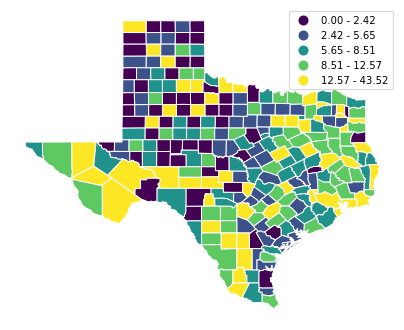

In [3]:
f, ax = plt.subplots(1, figsize=(7, 7))
gdf.plot(column='HR90', scheme='QUANTILES', ax=ax,
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [4]:
hr90 = gdf['HR90']
hr90q5 = mapclassify.Quantiles(hr90, k=5)
hr90q5

               Quantiles                
 
Lower            Upper             Count
         x[i] <=  2.421               51
 2.421 < x[i] <=  5.652               51
 5.652 < x[i] <=  8.510               50
 8.510 < x[i] <= 12.571               51
12.571 < x[i] <= 43.516               51

In [5]:
hr90q4 = mapclassify.Quantiles(hr90, k=4)
hr90q4

               Quantiles                
 
Lower            Upper             Count
         x[i] <=  3.918               64
 3.918 < x[i] <=  7.232               63
 7.232 < x[i] <= 11.414               63
11.414 < x[i] <= 43.516               64

In [6]:
hr90e5 = mapclassify.EqualInterval(hr90, k=5)
hr90e5

              Equal Interval             
 
Lower            Upper              Count
         x[i] <=  8.703               157
 8.703 < x[i] <= 17.406                76
17.406 < x[i] <= 26.110                16
26.110 < x[i] <= 34.813                 2
34.813 < x[i] <= 43.516                 3

In [7]:
hr90fj5 = mapclassify.FisherJenks(hr90, k=5)
hr90fj5

               FisherJenks               
 
Lower            Upper              Count
         x[i] <=  3.156                55
 3.156 < x[i] <=  8.846               104
 8.846 < x[i] <= 15.881                64
15.881 < x[i] <= 27.640                27
27.640 < x[i] <= 43.516                 4

In [8]:
hr90fj5.adcm # measure of fit: Absolute deviation around class means

352.10763138100003

In [9]:
hr90q5.adcm # the lower, counts in class are more similar

361.5413784392

In [10]:
hr90e5.adcm

614.5109370421006

In [11]:
hr90fj5.yb[0:10] # what bin each value is placed in

array([0, 0, 3, 0, 1, 0, 0, 0, 0, 1])

In [12]:
hr90fj5.bins # upper bounds of each bin

array([ 3.15613527,  8.84642604, 15.88088069, 27.63957988, 43.51610096])

## GeoPandas

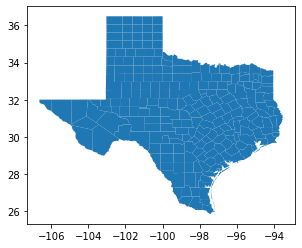

In [13]:
import geopandas as gpd
shp_link = "data/texas.shp"
tx = gpd.read_file(shp_link)
tx.plot()

In [14]:
type(tx)

geopandas.geodataframe.GeoDataFrame

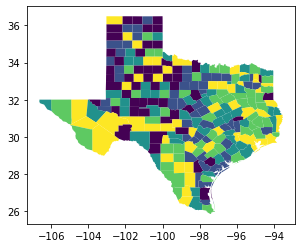

In [15]:
tx.plot(column='HR90', scheme='QUANTILES') # uses pysal classifier under the hood

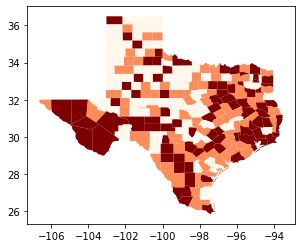

In [16]:
tx.plot(column='HR90', scheme='QUANTILES', k=3, cmap='OrRd') # we need a continuous color map

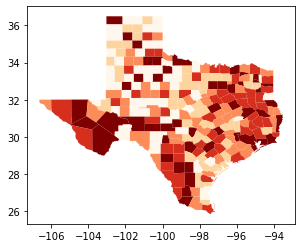

In [17]:
tx.plot(column='HR90', scheme='QUANTILES', k=5, cmap='OrRd') # bump up to quintiles

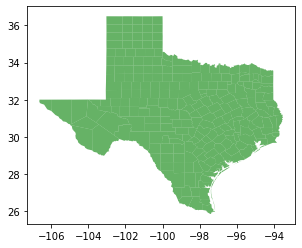

In [18]:
tx.plot(color='green', alpha=0.6) # explore options, polygon fills, alpha values

In [19]:
?? gdf.plot

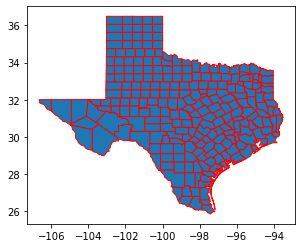

In [20]:
tx.plot(edgecolor='red') # border

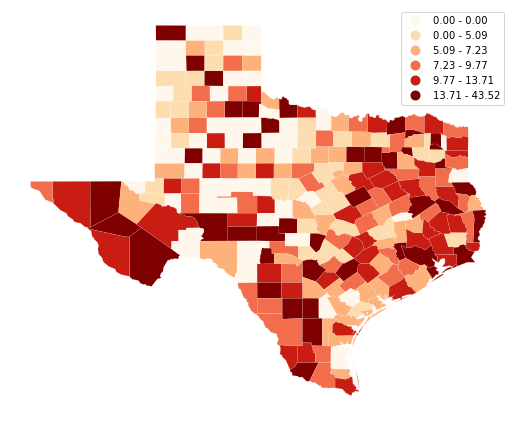

In [21]:
import matplotlib.pyplot as plt # make plot larger

f, ax = plt.subplots(1, figsize=(9, 9))
tx.plot(column='HR90', scheme='QUANTILES', \
        k=6, cmap='OrRd', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

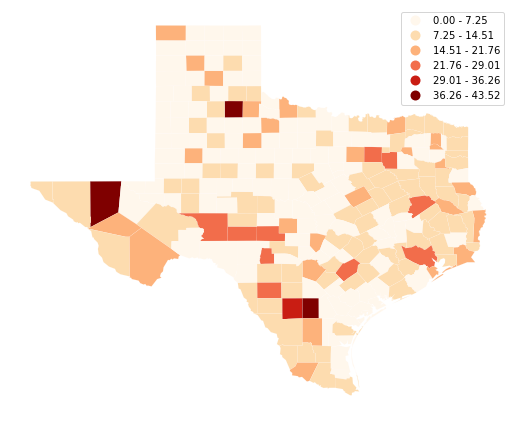

In [22]:
f, ax = plt.subplots(1, figsize=(9, 9))
tx.plot(column='HR90', scheme='equal_interval', \
        k=6, cmap='OrRd', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

## splot - PySAL visualization package

In 2018 we started building the [`splot`](https://gist.github.com/slumnitz/a86ef4a5b48b1b5fac41e91cfd05fff2) package which connects spatial analysis done in the [Python Spatial Analysis Library](https://github.com/pysal), `PySAL`, to popular visualisation toolkits like [`matplotlib`](https://matplotlib.org). It provides users quick access to visualise PySAL objects, offering different views on spatial analysis workflows. Ultimately, `splot` facilitates the creation of both static plots ready for publication and interactive visualisations for quick iteration and spatial data exploration.

`splot` can be imported as it's own package or is part of the `pysal` metapackage found under:

In [23]:
from pysal.viz import splot

Building on top of our experiences, `splot`'s functionality can be accessed in two main ways: 
* First, basic `splot` visualisations are exposed as `.plot` methods on PySAL objects. 
* Scond, all visualisations can be found and called using a `splot.'PySAL_sub-package'` namespace, depending on the previously analysed object that needs to be visualised (e.g.`pysal.viz.splot.giddy`).

We recommend 

* [Chris Moffitt’s Effectively Using Matplotlib](https://pbpython.com/effective-matplotlib.html) as a crash course and
* [Nicolas P. Rougier’s Matplotlib tutorial](https://github.com/rougier/matplotlib-tutorial) for an in-depth dive into matplotlib

## Value-by-Alpha Choropleth

#### splot.mapping

In addition to object and `PySAL` sub-package specific analytical visualizations `splot` offers a range of `.mapping` and visualization utility functionality. This functionality can be extended in future to be `splot`'s designated core functionality, offering classic visual diagnostic tools for spatial analysis. Map and cartographic visualisations, for example, provide great potential to examine spatial processes, dynamics and relationships with only minor additional underlying data processing. Furthermore, this mapping fucntionality is not only advantageous to use on its own but a great addition to several `PySAL` sub-packages like `mapclassify`.

`splot` functionality currently offers:
* **Value-by-Alpha map functionality** including:
    * `value_by_alpha_cmap()`
    * `vba_choropleth()`
    * `vba_legend()`
* **`mapclassify` value binning** with `mapclassify_bin()`
* **Colormap utilities** including:
    * `shift_colormap()`
    * `truncate_colormap()`

#### Visual analytics using: vba_choropleth()

In a nutshell, a Value-by-Alpha Choropleth is a bivariate choropleth that uses the values of the second input variable `y` as a transparency mask, determining how much of the choropleth displaying the values of a first variable `x` is shown. In comparison to a cartogram, Value-By-Alpha choropleths will not distort shapes and sizes but modify the alpha channel (transparency) of polygons according to the second input variable `y`. A Value-by-Alpha Choropleth is therefore another powerful tool to examine relationships of two variable in space.

In [24]:
from pysal.viz.splot.mapping import vba_choropleth
from pysal.lib import examples

Load example data into a `geopandas.GeoDataFrame` and inspect column names. In this example we will use the `columbus.shp` file containing neighborhood crime data of 1980.

In [25]:
link_to_data = examples.get_path('columbus.shp')
gdf = gpd.read_file(link_to_data)
gdf.columns

Index(['AREA', 'PERIMETER', 'COLUMBUS_', 'COLUMBUS_I', 'POLYID', 'NEIG',
       'HOVAL', 'INC', 'CRIME', 'OPEN', 'PLUMB', 'DISCBD', 'X', 'Y', 'NSA',
       'NSB', 'EW', 'CP', 'THOUS', 'NEIGNO', 'geometry'],
      dtype='object')

In [26]:
x = gdf['HOVAL'].values
y = gdf['CRIME'].values

We will plot a Value-by-Alpha Choropleth with `x` defining the rgb values and `y` defining the alpha value. For comparison we plot a choropleth of `x` with `gdf.plot()`:

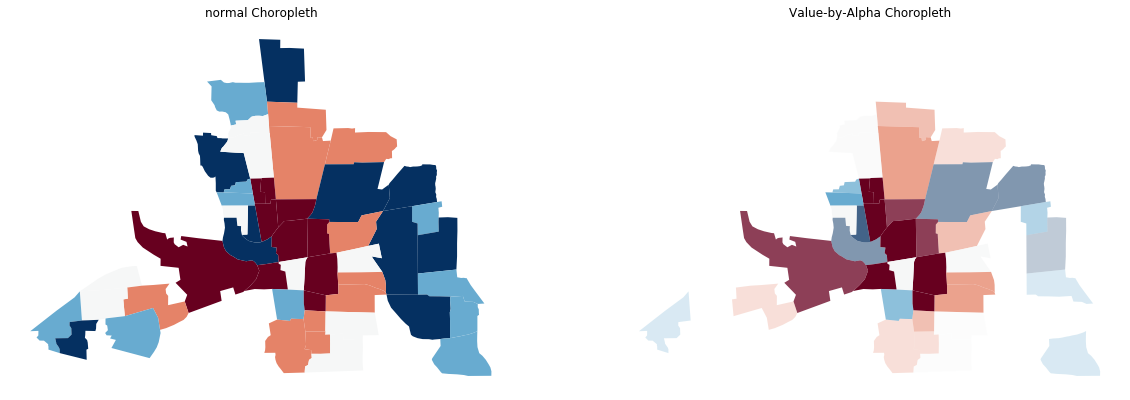

In [27]:
# Create new figure
fig, axs = plt.subplots(1,2, figsize=(20,10))

# use gdf.plot() to create regular choropleth
gdf.plot(column='HOVAL', scheme='quantiles', cmap='RdBu', ax=axs[0])

# use vba_choropleth to create Value-by-Alpha Choropleth
vba_choropleth(x, y, gdf, rgb_mapclassify=dict(classifier='quantiles'),
               alpha_mapclassify=dict(classifier='quantiles'),
               cmap='RdBu', ax=axs[1])

# set figure style
axs[0].set_title('normal Choropleth')
axs[0].set_axis_off()
axs[1].set_title('Value-by-Alpha Choropleth')

# plot
plt.show()

You can see the original choropleth is fading into transparency wherever there is a high `y` value.

You can use the option to bin or classify your `x` and `y` values. `splot` uses mapclassify to bin your data and displays the new color and alpha ranges:

/home/serge/anaconda3/envs/pysalworkshop/lib/python3.6/site-packages/pysal/viz/mapclassify/classifiers.py:482: UserWarning: Deprecated (2.1.0): Natural_Breaks is being renamed to NaturalBreaks. Natural_Breaks will be removed on 2020-01-31.
  warn(self.message)
/home/serge/anaconda3/envs/pysalworkshop/lib/python3.6/site-packages/pysal/viz/mapclassify/classifiers.py:482: UserWarning: Deprecated (2.1.0): Natural_Breaks is being renamed to NaturalBreaks. Natural_Breaks will be removed on 2020-01-31.
  warn(self.message)
/home/serge/anaconda3/envs/pysalworkshop/lib/python3.6/site-packages/pysal/viz/mapclassify/classifiers.py:482: UserWarning: Deprecated (2.1.0): Std_Mean is being renamed to StdMean. Std_Mean will be removed on 2020-01-31.
  warn(self.message)
/home/serge/anaconda3/envs/pysalworkshop/lib/python3.6/site-packages/pysal/viz/mapclassify/classifiers.py:482: UserWarning: Deprecated (2.1.0): Fisher_Jenks is being renamed to FisherJenks. Fisher_Jenks will be removed on 2020-01-31.
 

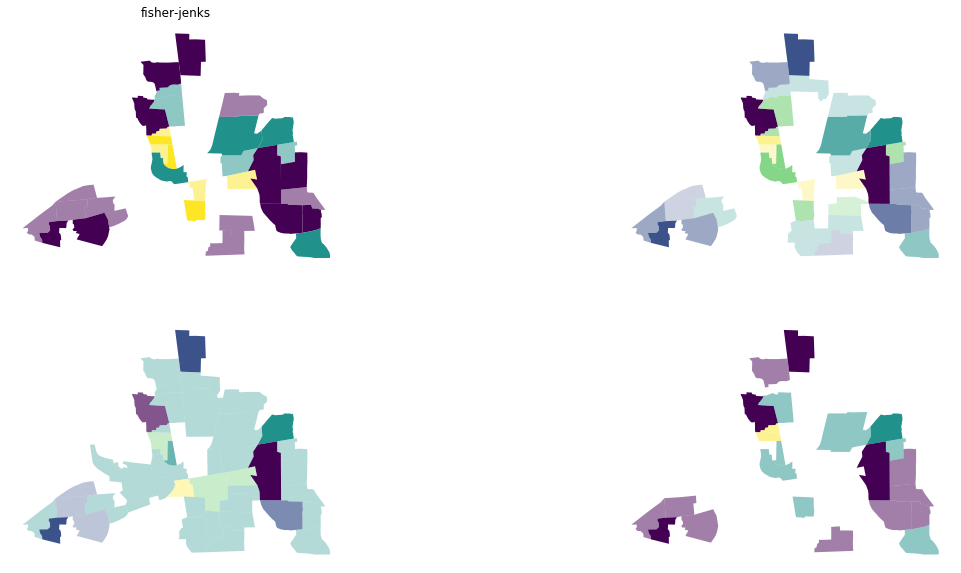

In [28]:
# Create new figure
fig, axs = plt.subplots(2,2, figsize=(20,10))

# classifier quantiles
vba_choropleth(y, x, gdf, cmap='viridis', ax = axs[0,0],
               rgb_mapclassify=dict(classifier='quantiles', k=3), 
               alpha_mapclassify=dict(classifier='quantiles', k=3))
axs[0,0].set_title('quantiles')

# classifier natural_breaks
vba_choropleth(y, x, gdf, cmap='viridis', ax = axs[0,1],
               rgb_mapclassify=dict(classifier='natural_breaks'), 
               alpha_mapclassify=dict(classifier='natural_breaks'))
axs[0,0].set_title('natural-breakes')

# classifier std_mean
vba_choropleth(y, x, gdf, cmap='viridis', ax = axs[1,0],
               rgb_mapclassify=dict(classifier='std_mean'), 
               alpha_mapclassify=dict(classifier='std_mean'))
axs[0,0].set_title('std-mean')

# classifier fisher_jenks
vba_choropleth(y, x, gdf, cmap='viridis', ax = axs[1,1],
               rgb_mapclassify=dict(classifier='fisher_jenks', k=3), 
               alpha_mapclassify=dict(classifier='fisher_jenks', k=3))
axs[0,0].set_title('fisher-jenks')

plt.show()

Instead of using a colormap you can also pass a list of colors:

In [29]:
color_list = ['#a1dab4','#41b6c4','#225ea8']

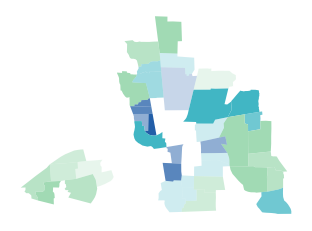

In [30]:
vba_choropleth(y, x, gdf, cmap=color_list,
               rgb_mapclassify=dict(classifier='quantiles', k=3), 
               alpha_mapclassify=dict(classifier='quantiles'))
plt.show()

Sometimes it is important in geospatial analysis to actually see the high values and let the small values fade out. With the `revert_alpha = True` argument, you can revert the transparency of the `y` values.

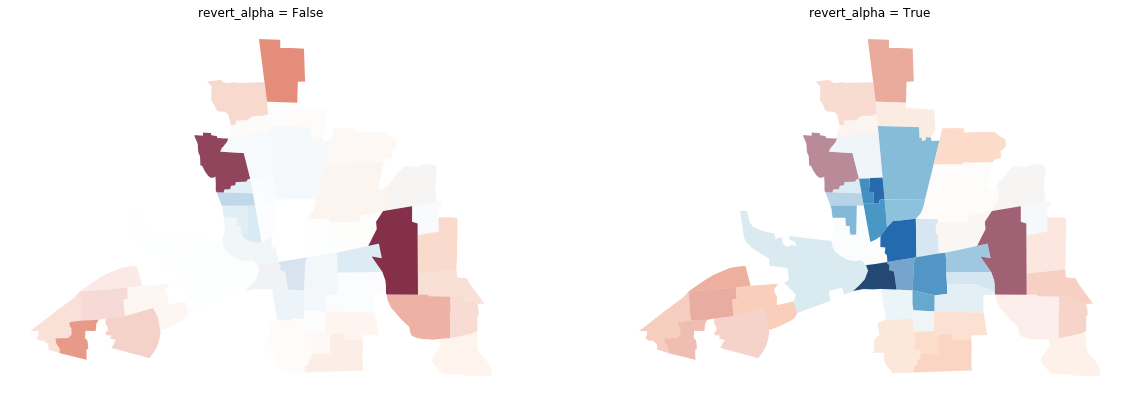

In [31]:
# create new figure
fig, axs = plt.subplots(1,2, figsize=(20,10))

# create a vba_choropleth
vba_choropleth(y, x, gdf, cmap='RdBu',
               divergent=False, ax=axs[0])

# set divergent to True
vba_choropleth(y, x, gdf, cmap='RdBu',
               divergent=True, ax=axs[1])

# set figure style
axs[0].set_title('revert_alpha = False')
axs[0].set_axis_off()
axs[1].set_title('revert_alpha = True')

# plot
plt.show()

# Create your own cmap for plotting

Sometimes you need to display divergent values with a natural midpoint not overlapping with he median of your data. For example if you measure the temperature over a country ranging from -2 to 10 degrees Celsius. Or if you need to assess wether a certain threshold is reached.

For cases like this `splot` provides a utility function to shift your colormap.

In [32]:
from pysal.viz.splot._viz_utils import shift_colormap
import matplotlib.pyplot as plt

In [33]:
# shift the midpoint to the 80st percentile of your datarange
mid08 = shift_colormap('RdBu', midpoint=0.8)

# shift the midpoint to the 20st percentile of your datarange
mid02 = shift_colormap('RdBu', midpoint=0.2)

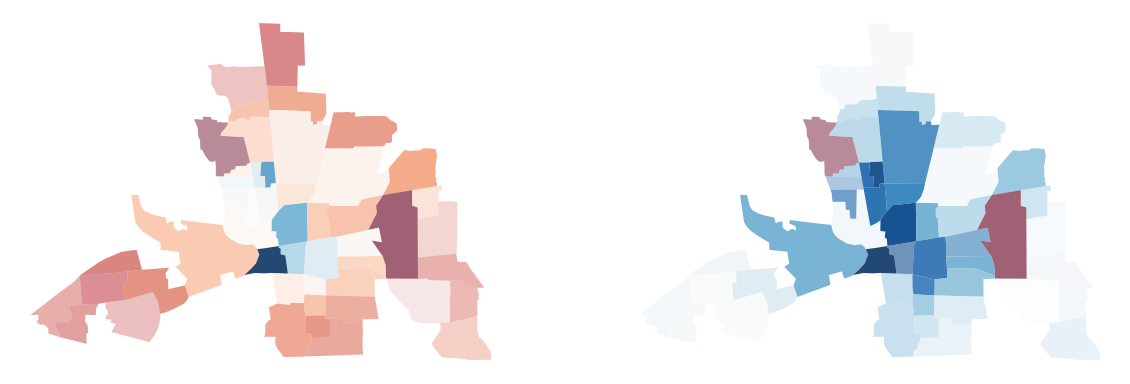

In [34]:
# create new figure
fig, axs = plt.subplots(1,2, figsize=(20,10))

# vba_choropleth with cmap mid08
vba_choropleth(y, x, gdf, cmap=mid08, ax=axs[0], divergent=True)

# vba_choropleth with cmap mid02
vba_choropleth(y, x, gdf, cmap=mid02, ax=axs[1], divergent=True)

# plot
plt.show()

#### Add a legend

If your values are classified, you have the option to add a legend to your map.

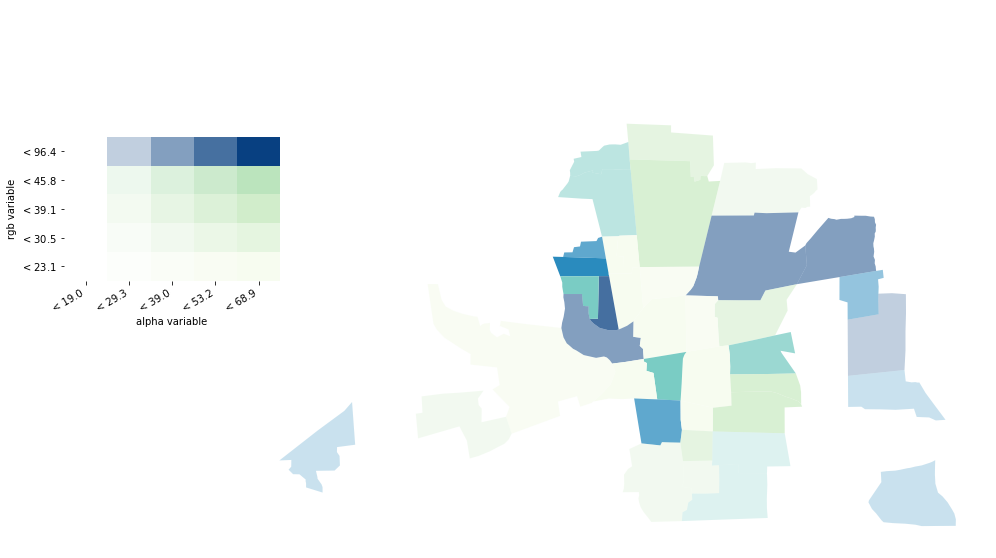

In [35]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
vba_choropleth(x, y, gdf,
               alpha_mapclassify=dict(classifier='quantiles', k=5),
               rgb_mapclassify=dict(classifier='quantiles', k=5),
               legend=True, ax=ax)
plt.show()

# Exercises

1. Explore `pysal.viz.mapclassify.` (hint: use tab completion) to select a new classifier (different from the ones in this notebook). Using the homicide rates for Texas counties (HR70 and HR90) prepare choropleths to compare the spatial distributions at two points in time.
2. Create your own Value-by-Alpha choropleth for HR70.

---

<a rel="license" href="http://creativecommons.org/licenses/by-nc-
sa/4.0/"><img alt="Creative Commons License" style="border-width:0"
src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span
xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Geovisualization</span> by <a xmlns:cc="http://creativecommons.org/ns#"
href="http://sergerey.org" property="cc:attributionName"
rel="cc:attributionURL">Serge Rey</a> is licensed under a <a
rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative
Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.